In [1]:
import itertools

In [2]:
import SimpleITK as sitk
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import clear_output
import pprint
import os, sys
import pandas_profiling
import sys
import json
from scipy import ndimage
import nibabel as nib 
from pathlib import Path
sys.path.insert(0, str(Path(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\src\registration_metric.pyy').resolve().parent.parent))
from src.eda_nifti import *
from src.registration_metric import *

# task1 체크

In [ ]:
raw_img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\rawdata\sub-strokecase0002\ses-0001\sub-strokecase0002_ses-0001_dwi.nii.gz')
img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\derivatives\sub-strokecase0004\ses-0001\sub-strokecase0004_ses-0001_msk.nii.gz')

In [ ]:
img_array = img.get_fdata()

img_array.shape

In [ ]:
plt.imshow(img_array[:,:,40])

In [ ]:
raw_img_array = raw_img.get_fdata()

In [ ]:
raw_img_array.shape

In [ ]:
plt.imshow(raw_img_array[:,:,40])

In [ ]:
x,y,z = raw_img.shape

In [ ]:
center_x, center_y, center_z = int(np.round(x/2)), int(np.round(y/2)), int(np.round(z/2))

In [ ]:
bottom = 'bottom   z :center_z    '
top = 'top   z center_z:    '

back = 'back  y  :center_y   '
front = 'front   y   center_y:    '

left = 'left    x   :center_x   '
right = 'right    x    center_x:    '

In [ ]:
initial_list = [[left,right], [back,front], [top,bottom]]

In [ ]:
combinations = list(itertools.product(*initial_list))

In [ ]:
combinations

In [ ]:
top_back_left = img_array[center_x:, :center_y,center_z:]
top_back_right = img_array [:center_x, :center_y ,:center_z]
top_front_left = img_array [:center_x, center_y:,center_z:]
top_front_right =img_array [:center_x, center_y:, :center_z]
bottom_back_left = img_array[center_x:, :center_y, center_z:] 
bottom_back_right = img_array[center_x: , :center_y , center_z]
bottmo_front_left = img_array[center_x:, center_y:, center_y:]
bottom_front_right = img_array [center_x:  , center_y:, :center_z ]

In [ ]:
## 신기한 표현

In [ ]:
instance_sample = "3:5"

vars()["instance_sample"]

In [ ]:
instance_sample = "3:5"

globals()["instance_sample"]

In [ ]:
instance_sample = "3:5"

locals()["instance_sample"]

In [7]:
nifti_anal = NiftiAnalysis()

### 태스크1 데이터프레임 만들기

In [ ]:
task1_nifti_files_list = nifti_anal.recursive_find_all_files(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1', '.nii.gz')

nifti_anal.save_summary_table(task1_nifti_files_list, 'task1.csv', 'task1')

# 태스크2 데이터프레임 만들기

In [3]:
raw_img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task2\Training\R002\sub-r002s002\ses-1\anat\sub-r002s002_ses-1_space-MNI152NLin2009aSym_label-L_desc-T1lesion_mask.nii.gz')
img = nib.load(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task2\Training\R002\sub-r002s002\ses-1\anat\sub-r002s002_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz')

In [4]:
img_array = img.get_fdata()
img_array.shape

(197, 233, 189)

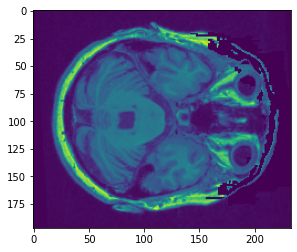

In [5]:
plt.imshow(img_array[:,:,40])

In [8]:
task1_nifti_files_list = nifti_anal.recursive_find_all_files(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task2', '.nii.gz')

nifti_anal.save_summary_table(task1_nifti_files_list, 'task2.csv', 'task2')

...summary table saved
